In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth( device=gpu, enable=True)
tf.config.experimental.list_physical_devices(device_type='GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [32]:
for ii in [0,2,6]:
    print(model.layers[ii].weights[0].shape)

(3, 3, 1, 32)
(3, 3, 32, 64)
(1600, 10)


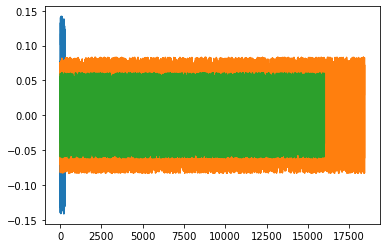

In [31]:
import matplotlib.pyplot as plt
for ii in [0,2,6]:
    plt.plot(np.reshape(model.layers[ii].weights[0].numpy(),-1))

In [9]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 37us/sample - loss: 0.4108 - accuracy: 0.8735 - val_loss: 0.1049 - val_accuracy: 0.9718
Epoch 2/15
48000/48000 [==============================] - 1s 24us/sample - loss: 0.1202 - accuracy: 0.9642 - val_loss: 0.0688 - val_accuracy: 0.9813
Epoch 3/15
48000/48000 [==============================] - 1s 24us/sample - loss: 0.0887 - accuracy: 0.9730 - val_loss: 0.0583 - val_accuracy: 0.9838
Epoch 4/15
48000/48000 [==============================] - 1s 24us/sample - loss: 0.0734 - accuracy: 0.9772 - val_loss: 0.0470 - val_accuracy: 0.9872
Epoch 5/15
48000/48000 [==============================] - 1s 25us/sample - loss: 0.0669 - accuracy: 0.9797 - val_loss: 0.0465 - val_accuracy: 0.9865
Epoch 6/15
48000/48000 [==============================] - 1s 24us/sample - loss: 0.0577 - accuracy: 0.9820 - val_loss: 0.0432 - val_accuracy: 0.9879
Epoch 7/15
48000/48000 [==============================] 

In [25]:
model